Import Necessary Libraries

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.lines as mlines

Load CSV's into the Dataframe

In [23]:
try:
    raw_sms_data = pd.read_csv('sms_dataset.csv', encoding='latin-1')
except UnicodeDecodeError:
    print("Error: Unable to decode using 'latin-1' encoding. Please check the file encoding.")
    exit(1)
    
try:
    raw_sms_data2 = pd.read_csv('mail_dataset.csv', encoding='latin-1')
except UnicodeDecodeError:
    print("Error: Unable to decode using 'latin-1' encoding. Please check the file encoding.")
    exit(1)


Concatenate both Datasets

In [24]:
raw_sms_data = pd.concat([raw_sms_data, raw_sms_data2], ignore_index=True)

Display some of the Dataset

In [25]:
raw_sms_data.head()

,Category,Message,Normalization
0,spam,J-PC:Spin & Win! 2K Bonus +3% GCASH! Visit 686...,j-pc:spin & win! 2k bonus +3% gcash! visit 686...
1,spam,",Enjoy online slot here at JACKPOT CITY and wi...",",enjoy online slot here at jackpot city and wi..."
2,spam,Claim the J'PC offer! Deposite & get 777 Free ...,claim the j'pc offer! deposite & get 777 free ...
3,spam,Diyos ng kayamanan ay nandito! Magdownload at ...,diyos ng kayamanan ay nandito! magdownload at ...
4,spam,Lahat ay gumagamit ng global currency na plata...,lahat ay gumagamit ng global currency na plata...


Replace Null Values with an Empty String

In [26]:
sms_data = raw_sms_data.fillna('')

Clean the 'Category' column values and convert to integers


In [27]:
sms_data['Category'] = sms_data['Category'].apply(lambda x: 0 if x.strip() == 'spam' else 1)

Separate Data into Texts and Labels

In [28]:
X = sms_data['Message']
Y = sms_data['Category']


Visualize the Distribution of Emails for Spam and Not Spam 

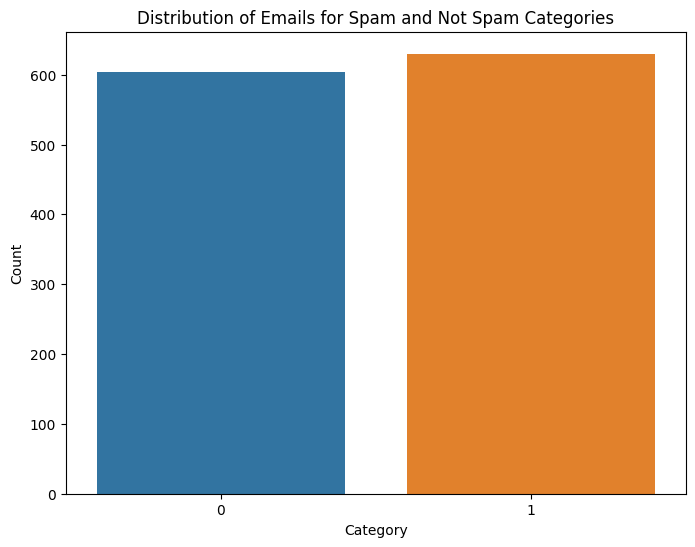

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=sms_data)
plt.title('Distribution of Emails for Spam and Not Spam Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Split the data into training data and test data

In [30]:
model = SVC(class_weight='balanced', kernel='linear')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Transform the text data to feature vectors that can be used as input to SVM

In [31]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

Convert X_train and X_test to feature vectors

In [32]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Train the model (SVM)

In [33]:
model = SVC(class_weight='balanced', kernel='linear') 
model.fit(X_train_features, Y_train)

SVC(class_weight='balanced', kernel='linear')

Prediction on training and test data

In [34]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
precision_on_training_data = precision_score(Y_train, prediction_on_training_data)
recall_on_training_data = recall_score(Y_train, prediction_on_training_data)
f1_on_training_data = f1_score(Y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
precision_on_test_data = precision_score(Y_test, prediction_on_test_data)
recall_on_test_data = recall_score(Y_test, prediction_on_test_data)
f1_on_test_data = f1_score(Y_test, prediction_on_test_data)

Ask for user input for prediction

In [35]:
sms_input = input('Enter Message: ')

Convert text to feature vectors

In [36]:
input_data_features = feature_extraction.transform([sms_input])

Make Prediction

In [37]:
my_prediction = model.predict(input_data_features)

Display Prediction

In [38]:
my_prediction = model.predict(input_data_features)
print("User Input:", sms_input)
print("Prediction:", "Spam" if my_prediction[0] == 0 else "Not Spam")
print("Accuracy on test data after prediction:", accuracy_on_test_data * 100, '%')
print("Precision on test data:", precision_on_test_data)
print("Recall on test data:", recall_on_test_data)
print("F1 score on test data:", f1_on_test_data)

User Input: ikaw ay nanalo ng iphone13 pro. i claim dito --> bit.ly/ss81dx
Prediction: Spam
Accuracy on test data after prediction: 92.3076923076923 %
Precision on test data: 0.9349593495934959
Recall on test data: 0.9126984126984127
F1 score on test data: 0.9236947791164658


Visualize the results of the classification on the test data


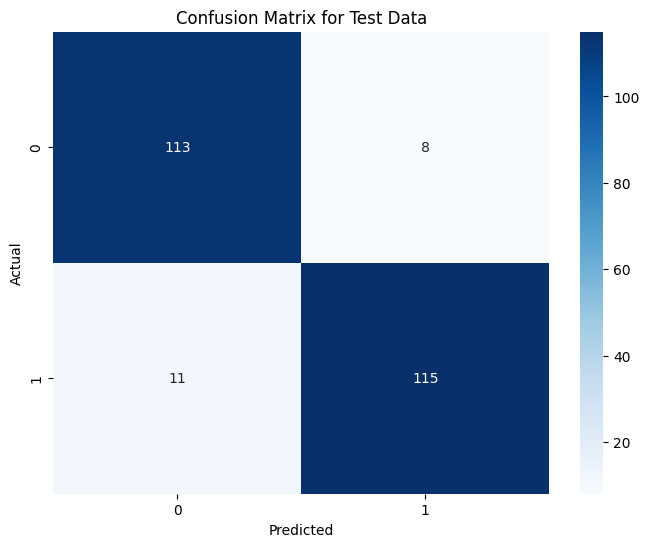

In [39]:
confusion_matrix = pd.crosstab(Y_test, prediction_on_test_data, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Data')
plt.show()

Display the classification report for the test data

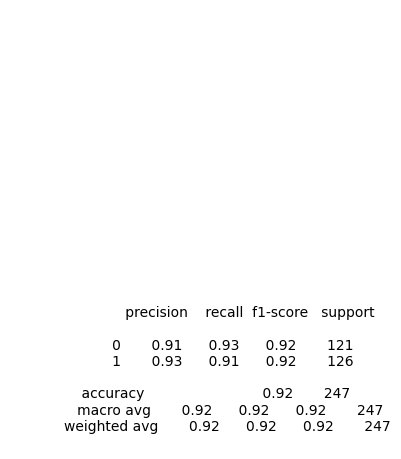

In [40]:
plt.subplot(1, 3, 3)
classification_report_test_data = classification_report(Y_test, prediction_on_test_data)
plt.text(0.5, -0.1, classification_report_test_data, transform=plt.gca().transAxes, fontsize=10, va='top')
plt.axis('off')

plt.tight_layout()
plt.show()

Visualize the decision boundary of the SVM model using PCA

In [41]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_features.toarray())

Plot the Classified and Incorrectly Classified points

<Axes: >

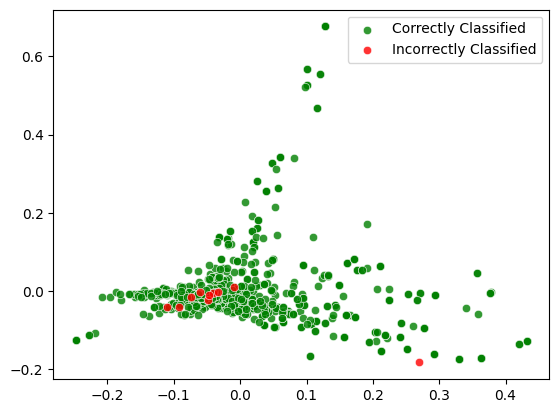

In [42]:
sns.scatterplot(x=X_train_pca[Y_train == model.predict(X_train_features), 0],
                y=X_train_pca[Y_train == model.predict(X_train_features), 1],
                color='green', label='Correctly Classified', alpha=0.8)

sns.scatterplot(x=X_train_pca[Y_train != model.predict(X_train_features), 0],
                y=X_train_pca[Y_train != model.predict(X_train_features), 1],
                color='red', label='Incorrectly Classified', alpha=0.8)
